In [2]:
import keras
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/ff dataset/Dataset/Dataset/train_set',target_size=(128, 128),batch_size=32,class_mode='binary')

Found 443 images belonging to 2 classes.


In [7]:
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/ff dataset/Dataset/Dataset/test_set',target_size=(128, 128),batch_size=32, class_mode='binary')

Found 121 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [9]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(128, 128, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(150,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [10]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
model.fit(x_train, steps_per_epoch=14, epochs=10, validation_data=x_test, validation_steps=4)

Epoch 1/10
14/14 [==============================] - 96s 7s/step - loss: 4.4398 - accuracy: 0.6275 - val_loss: 0.3537 - val_accuracy: 0.9091
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 0.8189 - accuracy: 0.7833 - val_loss: 0.6837 - val_accuracy: 0.8182
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.5837 - accuracy: 0.7901 - val_loss: 0.1477 - val_accuracy: 0.9339
Epoch 4/10
14/14 [==============================] - 27s 2s/step - loss: 0.2250 - accuracy: 0.9074 - val_loss: 0.0803 - val_accuracy: 0.9587
Epoch 5/10
14/14 [==============================] - 31s 2s/step - loss: 0.2095 - accuracy: 0.9074 - val_loss: 0.0761 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.1867 - accuracy: 0.9233 - val_loss: 0.0505 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 28s 2s/step - loss: 0.1740 - accuracy: 0.9255 - val_loss: 0.0600 - val_accuracy: 0.9752
Epoch 8/10
14/14 [==

In [15]:
model.save('/content/drive/My Drive/ff dataset/forest1.h5')

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [30]:
img = image.load_img("/content/drive/MyDrive/ff dataset/Dataset/Dataset/test_set/with fire/image.jpg")
x = image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(res, axis=0)

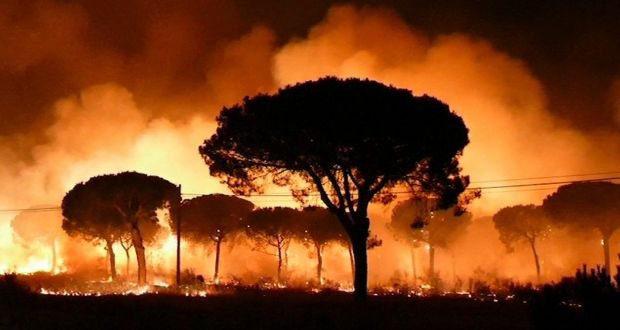

In [31]:
img

In [18]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [19]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=87a959b77ef27a8ac81cc49427f998c8b393abdb4a289b883eeac56bf62b2d77
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [20]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [23]:
name=['forest','with fire']

In [24]:
from google.colab.patches import cv2_imshow

In [25]:
cap = cv2.VideoCapture('/content/drive/MyDrive/ibm/fire/dataset/test_set/fire.mp4')

if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  success, frame = cap.read()
  if success == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/ibm/fire/forest.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()


Error opening video stream or file


In [27]:
account_sid = 'ACb0eefb4e6364ae26e9591b2a756bbc8f'
auth_token = '529a2aad5ebe686036a9da6f65df5c26'
client = Client(account_sid, auth_token)

message = client.messages \
    .create(
         body='Forest fire is detected , stay alert',
         from_='+13465507864',
         to='+917397487445'
     )

print(message.sid)

SM18ffb864f690f492f4e59238b4aa4704
